In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spicy import stats
import os
from sklearn.neighbors import KNeighborsClassifier

%run ../datos/datos.ipynb # me importo dataset
%run ../knn/KNN.ipynb # me importo dataset

## Obligatorios con distancia coseno

Vemos KNN con k = 5 fijo, separamos 80% de training y 20% testeo

In [2]:
def knn_con_k_fijo(dimensiones, distancia):
    X_train, y_train, _, _ = datosConDistribucion(dimensiones)
    
    n = len(X_train)
    alto = n // 5
    indices = np.arange(n)
    
    test_indices = indices[0: alto]
    train_indices = np.concatenate((indices[:0], indices[alto:]))
    
    res = knn(X_train[train_indices], X_train[test_indices], y_train[train_indices], y_train[test_indices], 5, distancia)
    
    return res

In [5]:
res500 = knn_con_k_fijo(500, 'coseno')
res1000 = knn_con_k_fijo(1000, 'coseno')
res5000 = knn_con_k_fijo(5000, 'coseno')

print(res500, res1000, res5000)

/tmp/ipykernel_345366/2236396736.py:13: RuntimeWarning: invalid value encountered in divide
  res = 1 - (prod / prodNorm)


- Mi knn: 0.65625
- KNeighborsClassifier: 0.65625
-------------------------------
- Mi knn: 0.75
- KNeighborsClassifier: 0.75
-------------------------------
- Mi knn: 0.6875
- KNeighborsClassifier: 0.6875
-------------------------------
0.65625 0.75 0.6875


Vemos KNN explorando valor de k

In [7]:
def k_optimo(dimension, distancia):
    promedios = np.zeros(len(np.arange(1, 321)), dtype=np.float64)
    x_train, y_train, _, _ = datosConDistribucion(dimension)
    n_samples = len(y_train)
    intentos_k = np.arange(1, n_samples + 1)
    res_k = np.zeros((len(intentos_k), 2), dtype=np.float64)
    
    for i in range(0, len(intentos_k)):
        #me voy a guardar (%, k del cálculo)
        promedio = k_fold_4(x_train, y_train, intentos_k[i], distancia)
        res_k[i][0] = promedio
        res_k[i][1] = intentos_k[i]
        promedios[i] = promedio

    data = {'porcentaje':promedios,  
            'valores_k':intentos_k}
    
    df = pd.DataFrame(data, columns = ['porcentaje', 'valores_k'])
    
    if os.path.exists(f'../knn/datos/porcentajes{dimension}{distancia}.csv'):
        os.remove(f'../knn/datos/porcentajes{dimension}{distancia}.csv')
    df.to_csv(f'../knn/datos/porcentajes{dimension}{distancia}.csv')

    indices = np.argsort(res_k[:,0]) # me devuelve de menor a mayor
    res_k = res_k[indices[::-1]] # yo lo quiero de mayor a 

    return res_k[0][1], res_k[0][0]

In [8]:
res500_optimo, res500_optimo_porcentaje = k_optimo(500, 'coseno')
res1000_optimo, res1000_optimo_porcentaje = k_optimo(1000, 'coseno')
res5000_optimo, res5000_optimo_porcentaje = k_optimo(5000, 'coseno')

print(res500_optimo, res500_optimo_porcentaje)
print(res1000_optimo, res1000_optimo_porcentaje)
print(res5000_optimo, res5000_optimo_porcentaje)

/tmp/ipykernel_345366/2236396736.py:13: RuntimeWarning: invalid value encountered in divide
  res = 1 - (prod / prodNorm)


30.0 0.7593749999999999
28.0 0.796875
31.0 0.815625


### Gráficos

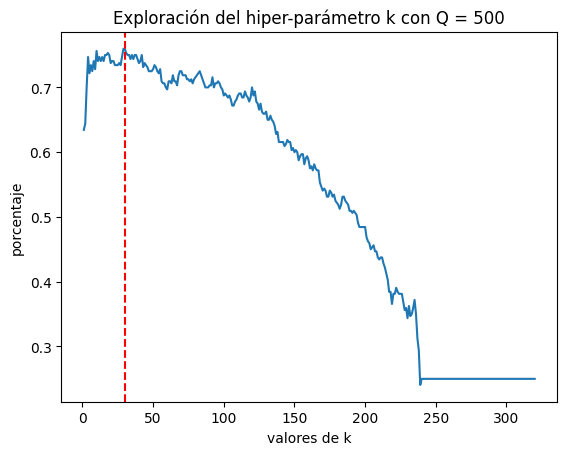

0.7593749999999999

In [9]:
df = pd.read_csv('../knn/datos/porcentajes500coseno.csv')

plt.title('Exploración del hiper-parámetro k con Q = 500')
plt.plot(df['valores_k'],df['porcentaje'])
plt.axvline(x=30, color='r', linestyle='--')
plt.xlabel('valores de k')
plt.ylabel('porcentaje')
plt.savefig('../graficos/k-optimo-500.png')
plt.show()

max(df['porcentaje'])

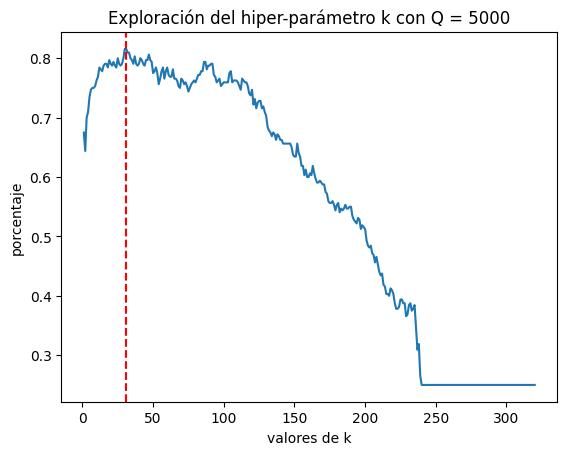

0.815625

In [10]:
df = pd.read_csv('../knn/datos/porcentajes5000coseno.csv')

plt.title('Exploración del hiper-parámetro k con Q = 5000')
plt.plot(df['valores_k'],df['porcentaje'])
plt.axvline(x=31, color='r', linestyle='--')
plt.xlabel('valores de k')
plt.ylabel('porcentaje')
plt.savefig('../graficos/k-optimo-5000.png')
plt.show()

max(df['porcentaje'])

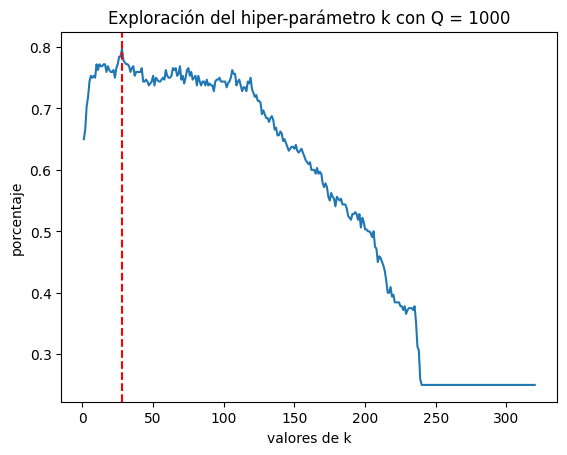

0.796875

In [11]:
df = pd.read_csv('../knn/datos/porcentajes1000coseno.csv')

plt.title('Exploración del hiper-parámetro k con Q = 1000')
plt.plot(df['valores_k'],df['porcentaje'])
plt.axvline(x=28, color='r', linestyle='--')
plt.xlabel('valores de k')
plt.ylabel('porcentaje')
plt.savefig('../graficos/k-optimo-1000.png')
plt.show()

max(df['porcentaje'])

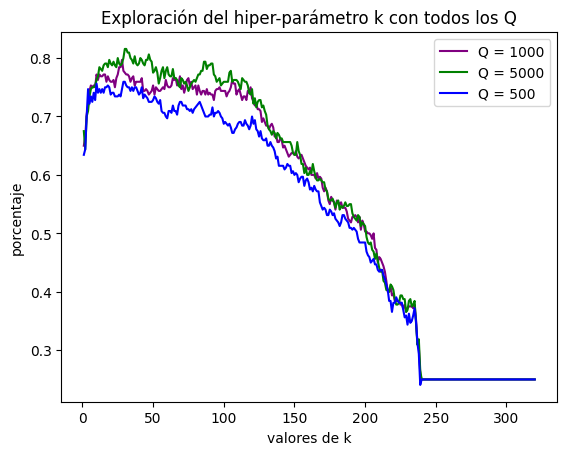

In [12]:
df1000 = pd.read_csv('../knn/datos/porcentajes1000coseno.csv')
df500 = pd.read_csv('../knn/datos/porcentajes500coseno.csv')
df5000 = pd.read_csv('../knn/datos/porcentajes5000coseno.csv')

plt.title('Exploración del hiper-parámetro k con todos los Q')
plt.plot(df1000['valores_k'],df1000['porcentaje'], label='Q = 1000', color='purple')
plt.plot(df5000['valores_k'],df5000['porcentaje'], label='Q = 5000', color='green')
plt.plot(df500['valores_k'],df500['porcentaje'], label='Q = 500', color='blue')
plt.xlabel('valores de k')
plt.ylabel('porcentaje')
plt.legend()
plt.savefig('../graficos/k-optimo-todos.png')
plt.show()


## Punto Opcional con distancia euclídea

In [14]:
res500_euclideo = knn_con_k_fijo(500, 'euclidiana')
res1000_euclideo = knn_con_k_fijo(1000, 'euclidiana')
res5000_euclideo = knn_con_k_fijo(5000, 'euclidiana')

print(res500_euclideo, res1000_euclideo, res5000_euclideo)

- Mi knn: 0.5
- KNeighborsClassifier: 0.515625
-------------------------------
- Mi knn: 0.453125
- KNeighborsClassifier: 0.453125
-------------------------------
- Mi knn: 0.40625
- KNeighborsClassifier: 0.40625
-------------------------------
0.5 0.453125 0.40625


In [16]:
res500_optimo_euclideo, res500_optimo_porcentaje_euclideo = k_optimo(500, 'euclidiana')
res1000_optimo_euclideo, res1000_optimo_porcentaje_euclideo = k_optimo(1000, 'euclidiana')
res5000_optimo_euclideo, res5000_optimo_porcentaje_euclideo = k_optimo(5000, 'euclidiana')

print(res500_optimo_euclideo, res500_optimo_porcentaje_euclideo)
print(res1000_optimo_euclideo, res1000_optimo_porcentaje_euclideo)
print(res5000_optimo_euclideo, res5000_optimo_porcentaje_euclideo)

1.0 0.546875
4.0 0.509375
1.0 0.44999999999999996


### Gráficos

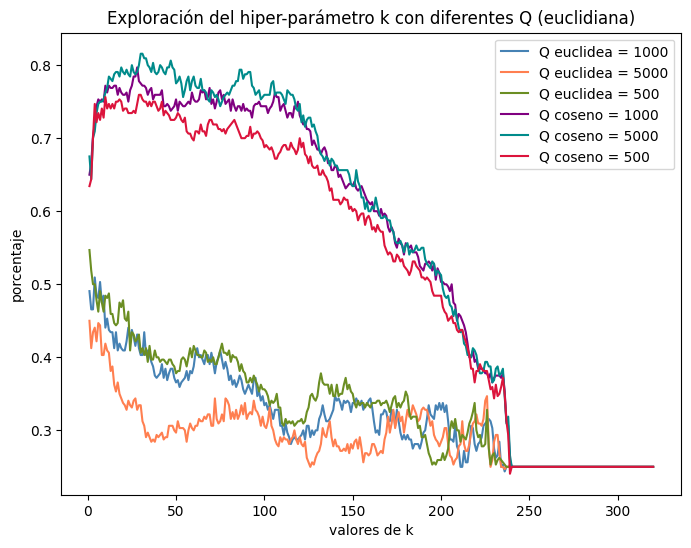

In [17]:
df_1000_euclidea = pd.read_csv('../knn/datos/porcentajes1000euclidiana.csv')
df_5000_euclidea = pd.read_csv('../knn/datos/porcentajes5000euclidiana.csv')
df_500_euclidea = pd.read_csv('../knn/datos/porcentajes500euclidiana.csv')
df1000 = pd.read_csv('../knn/datos/porcentajes1000coseno.csv')
df500 = pd.read_csv('../knn/datos/porcentajes500coseno.csv')
df5000 = pd.read_csv('../knn/datos/porcentajes5000coseno.csv')
# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar cada conjunto de datos
plt.plot(df_1000_euclidea['valores_k'], df_1000_euclidea['porcentaje'], label='Q euclidea = 1000', color='steelblue')
plt.plot(df_5000_euclidea['valores_k'], df_5000_euclidea['porcentaje'], label='Q euclidea = 5000', color='coral')
plt.plot(df_500_euclidea['valores_k'], df_500_euclidea['porcentaje'], label='Q euclidea = 500', color='olivedrab')
plt.plot(df1000['valores_k'],df1000['porcentaje'], label='Q coseno = 1000', color='purple')
plt.plot(df5000['valores_k'],df5000['porcentaje'], label='Q coseno = 5000', color='darkcyan')
plt.plot(df500['valores_k'],df500['porcentaje'], label='Q coseno = 500', color='crimson')
# Agregar título y etiquetas
plt.title('Exploración del hiper-parámetro k con diferentes Q (euclidiana)')
plt.xlabel('valores de k')
plt.ylabel('porcentaje')
plt.legend()  # Mostrar leyenda

# Guardar la figura
plt.savefig('../graficos/k-optimo-combinado.png')

# Mostrar el gráfico
plt.show()